In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from tqdm.notebook import tqdm
from PIL import Image
warnings.filterwarnings('ignore')
%matplotlib inline

import tensorflow as tf
from tensorflow.keras.utils import load_img
from keras.models import Sequential, Model
from keras.layers import Dense, Conv2D, Dropout, Flatten, MaxPooling2D, Input

In [2]:
def load_labels_1_train():
    datasets_dir = "../Datasets/celeba/"
    img_dir = "img/"
    labels_filename = "labels.csv"

    df = pd.read_csv(datasets_dir + labels_filename, sep = "\t")
    df["img_dir"] = datasets_dir + img_dir + df["img_name"]
    
    df["smiling"] = df["smiling"].replace(-1, 0)

    df = df[["img_dir", "smiling"]]
    print(df.head())
    return df

def load_labels_1_test():
    datasets_dir = "../Datasets/celeba_test/"
    img_dir = "img/"
    labels_filename = "labels.csv"

    df = pd.read_csv(datasets_dir + labels_filename, sep = "\t")
    df["img_dir"] = datasets_dir + img_dir + df["img_name"]
    
    df["smiling"] = df["smiling"].replace(-1, 0)

    df = df[["img_dir", "smiling"]]
    print(df.head())
    return df

In [3]:
labels_train = load_labels_1_train()

                        img_dir  smiling
0  ../Datasets/celeba/img/0.jpg        1
1  ../Datasets/celeba/img/1.jpg        1
2  ../Datasets/celeba/img/2.jpg        0
3  ../Datasets/celeba/img/3.jpg        0
4  ../Datasets/celeba/img/4.jpg        0


In [4]:
labels_test = load_labels_1_test()

                             img_dir  smiling
0  ../Datasets/celeba_test/img/0.jpg        0
1  ../Datasets/celeba_test/img/1.jpg        1
2  ../Datasets/celeba_test/img/2.jpg        1
3  ../Datasets/celeba_test/img/3.jpg        1
4  ../Datasets/celeba_test/img/4.jpg        0


In [5]:
smiling_dict = {1:'Smiling', 0:'Not Smiling'}

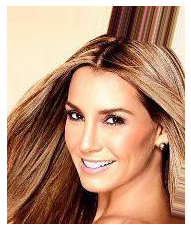

In [6]:
img = Image.open(labels_train['img_dir'][0])
plt.axis('off')
plt.imshow(img);

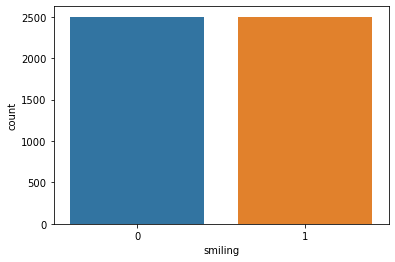

In [7]:
sns.countplot(labels_train['smiling']);

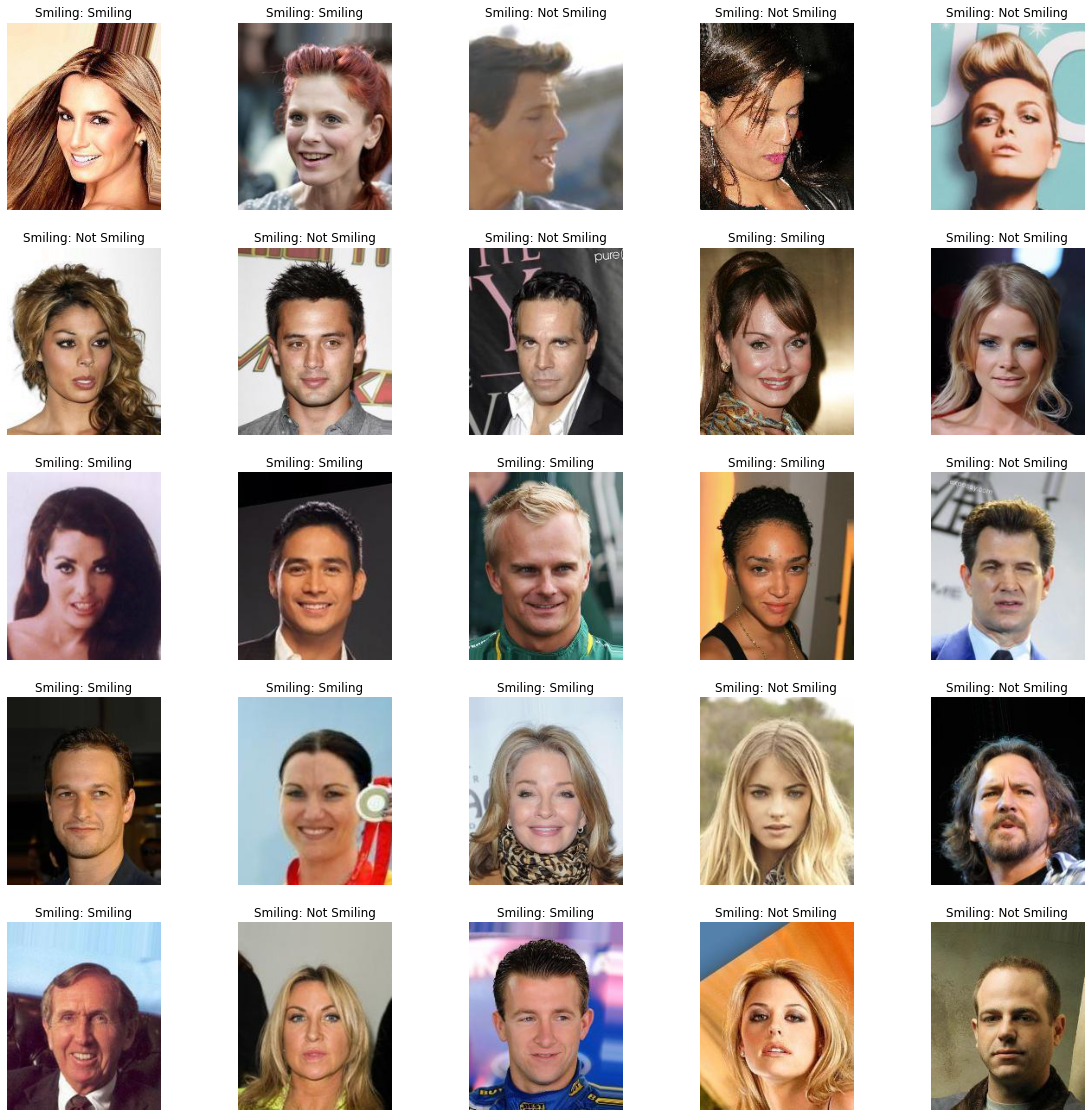

In [8]:
plt.figure(figsize=(20, 20))
files = labels_train.iloc[0:25]

for index, file, smiling in files.itertuples():
    plt.subplot(5, 5, index+1)
    img = load_img(file)
    img = np.array(img)
    plt.imshow(img)
    plt.title(f"Smiling: {smiling_dict[smiling]}")
    plt.axis('off')

In [9]:
def extract_features(images):
    features = []
    for image in tqdm(images):
        img = load_img(image)
        img = img.resize((128, 128), Image.LANCZOS)
        # img = img.resize((128, 128), Image.ANTIALIAS)
        img = np.array(img)
        features.append(img)
        
    features = np.array(features)
    # ignore this step if using RGB
    # features = features.reshape(len(features), 128, 128, 3)
    return features

In [10]:
x_train = extract_features(labels_train['img_dir'])

  0%|          | 0/5000 [00:00<?, ?it/s]

In [11]:
x_train.shape

(5000, 128, 128, 3)

In [12]:
x_train = x_train/255.0

In [13]:
y_train = np.array(labels_train['smiling'])

In [14]:
input_shape = (128, 128, 3)

https://towardsdatascience.com/no-kernels-filters-are-not-the-same-b230ec192ac9#:~:text=%F0%9F%91%89%F0%9F%8F%BD%20The%20Filter&text=For%20the%20first%20argument%20while,shape%20H%27%20*%20w%27%20.
- Filter

https://cs231n.github.io/convolutional-networks/
- CNN Layer Explaination

In [17]:
inputs = Input((input_shape))
# convolutional layers
conv_1 = Conv2D(32, kernel_size=(3, 3), activation='relu') (inputs)
maxp_1 = MaxPooling2D(pool_size=(2, 2)) (conv_1)
conv_2 = Conv2D(64, kernel_size=(3, 3), activation='relu') (maxp_1)
maxp_2 = MaxPooling2D(pool_size=(2, 2)) (conv_2)
conv_3 = Conv2D(128, kernel_size=(3, 3), activation='relu') (maxp_2)
maxp_3 = MaxPooling2D(pool_size=(2, 2)) (conv_3)

flatten = Flatten() (maxp_3)

# fully connected layers
dense = Dense(256, activation='relu') (flatten)

dropout = Dropout(0.3) (dense)

outputs = Dense(1, activation='sigmoid', name='smiling_out') (dropout)

model = Model(inputs=[inputs], outputs=[outputs])

model.compile(loss=['binary_crossentropy'], optimizer='adam', metrics=['accuracy'])

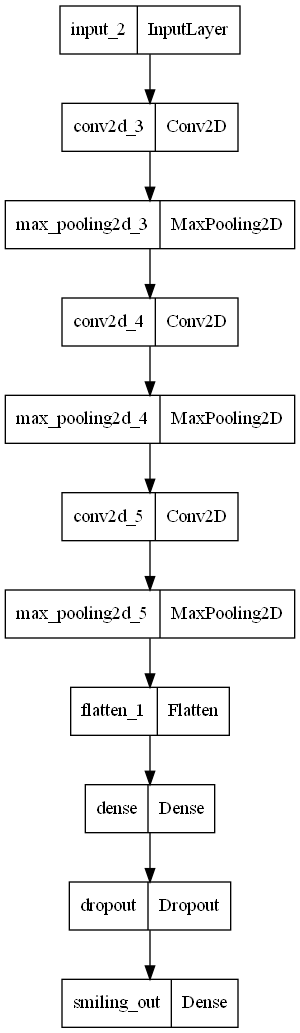

In [18]:
# plot the model
from tensorflow.keras.utils import plot_model
plot_model(model)

In [19]:
history = model.fit(x=x_train, y=y_train, batch_size=50, epochs=20, validation_split=0.2)

Epoch 1/20
80/80 [==============================] - 70s 839ms/step - loss: 0.6800 - accuracy: 0.5740 - val_loss: 0.6753 - val_accuracy: 0.6190
Epoch 2/20
80/80 [==============================] - 67s 840ms/step - loss: 0.4932 - accuracy: 0.7645 - val_loss: 0.4143 - val_accuracy: 0.8010
Epoch 3/20
80/80 [==============================] - 68s 852ms/step - loss: 0.3416 - accuracy: 0.8455 - val_loss: 0.4029 - val_accuracy: 0.8160
Epoch 4/20
80/80 [==============================] - 69s 856ms/step - loss: 0.2765 - accuracy: 0.8802 - val_loss: 0.3409 - val_accuracy: 0.8500
Epoch 5/20
80/80 [==============================] - 69s 862ms/step - loss: 0.2580 - accuracy: 0.8925 - val_loss: 0.3396 - val_accuracy: 0.8500
Epoch 6/20
80/80 [==============================] - 67s 843ms/step - loss: 0.2096 - accuracy: 0.9070 - val_loss: 0.3680 - val_accuracy: 0.8350
Epoch 7/20
80/80 [==============================] - 71s 882ms/step - loss: 0.1919 - accuracy: 0.9245 - val_loss: 0.4742 - val_accuracy: 0.8140

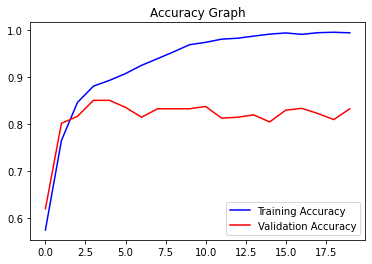

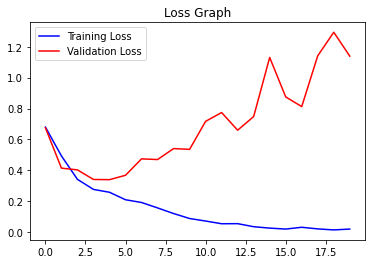

In [21]:
# plot results for smiling
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
epochs = range(len(acc))

plt.plot(epochs, acc, 'b', label='Training Accuracy')
plt.plot(epochs, val_acc, 'r', label='Validation Accuracy')
plt.title('Accuracy Graph')
plt.legend()
plt.figure()

loss = history.history['loss']
val_loss = history.history['val_loss']

plt.plot(epochs, loss, 'b', label='Training Loss')
plt.plot(epochs, val_loss, 'r', label='Validation Loss')
plt.title('Loss Graph')
plt.legend()
plt.show()

In [22]:
x_test = extract_features(labels_test["img_dir"])

  0%|          | 0/1000 [00:00<?, ?it/s]

In [23]:
x_test = x_test/255.0

Original Smiling: Not Smiling
1/1 [==============================] - 0s 292ms/step
Predicted Smiling: Not Smiling


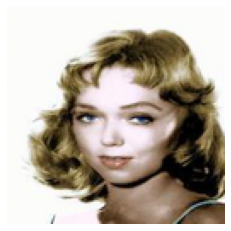

In [32]:
img_index = 0
print("Original Smiling:", smiling_dict[y_test[img_index]])
# predict from model
pred = model.predict(x_test[img_index].reshape(1, 128, 128, 3))
pred_smiling = smiling_dict[round(pred[0][0])]
print("Predicted Smiling:", pred_smiling)
plt.axis('off')
plt.imshow(x_test[img_index].reshape(128, 128, 3), cmap='gray');

In [25]:
y_test = np.array(labels_test['smiling'])

In [26]:
results = model.evaluate(x=x_test, y=y_test, batch_size=100)

10/10 [==============================] - 6s 385ms/step - loss: 0.8837 - accuracy: 0.8550
